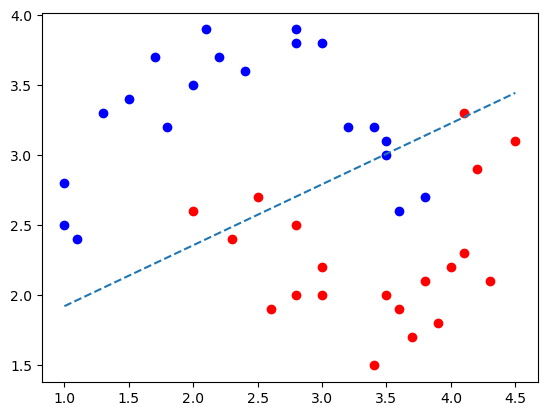

In [9]:
#課題１
import numpy as np
from sklearn.linear_model import LogisticRegression

data1 = [
 [4.2, 2.9], [2.5, 2.7], [4.1, 3.3], [3.0, 2.2], [2.8, 2.5],
 [4.3, 2.1], [4.5, 3.1], [2.6, 1.9], [3.9, 1.8], [2.8, 2.0],
 [3.7, 1.7], [3.5, 2.0], [3.6, 1.9], [2.3, 2.4], [2.0, 2.6],
 [4.0, 2.2], [3.4, 1.5], [4.1, 2.3], [3.0, 2.0], [3.8, 2.1]
]

target1 = [
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
]

data2 = [
 [2.0, 3.5], [2.8, 3.8], [3.2, 3.2], [3.5, 3.1], [2.4, 3.6],
 [1.0, 2.5], [2.1, 3.9], [1.1, 2.4], [1.5, 3.4], [1.7, 3.7],
 [3.4, 3.2], [3.8, 2.7], [1.3, 3.3], [1.0, 2.8], [3.0, 3.8],
 [3.6, 2.6], [2.8, 3.9], [3.5, 3.0], [1.8, 3.2], [2.2, 3.7]
]

target2 = [
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
]

data1 = np.array(data1)
data2 = np.array(data2)
target1 = np.array(target1)
target2 = np.array(target2)
data = np.vstack((data1, data2))
target = np.hstack((target1, target2))

import matplotlib.pyplot as plt
plt.scatter(data1[:, 0], data1[:, 1], color = "r", label = "data1")
plt.scatter(data2[:, 0], data2[:, 1], color = 'b', label = "data2")

log = LogisticRegression()
log.fit(data, target)

coef = log.coef_[0]
intercept = log.intercept_[0]
x = np.linspace(data[:, 0].min(), data[:, 0].max(), 100)
y = (-intercept - coef[0] * x) / coef[1]
plt.plot(x, y, linestyle='--')
plt.show()

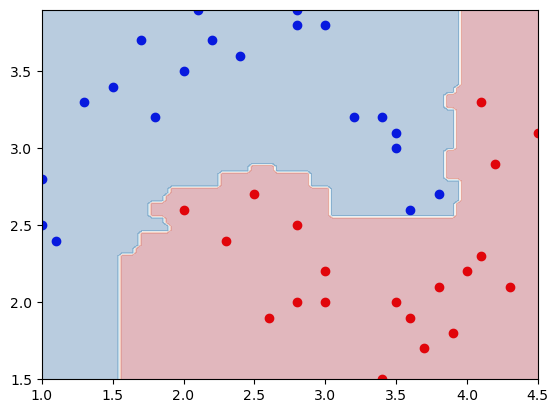

In [10]:
#課題２
plt.scatter(data1[:, 0], data1[:, 1], color = "r", label = "data1")
plt.scatter(data2[:, 0], data2[:, 1], color = 'b', label = "data2")

import numpy as np
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=500, random_state=42)
clf.fit(data, target)

x = np.linspace(data[:, 0].min(), data[:, 0].max(), 100)
y = np.linspace(data[:, 1].min(), data[:, 1].max(), 100)
xx, yy = np.meshgrid(x, y)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.3)
plt.show()

#確かに赤点と青点が領域で分けられている

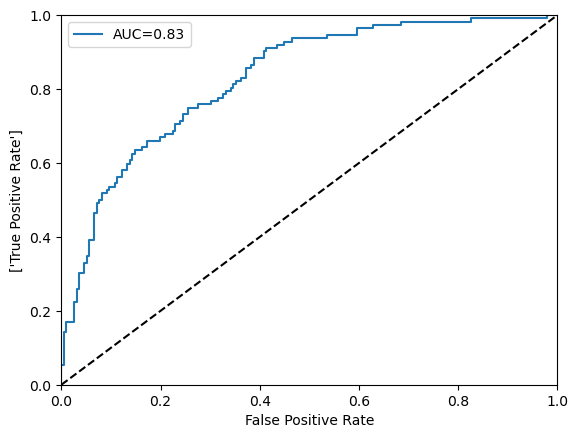

[0.07946452 0.27766424 0.08860672 0.08141851 0.06843328 0.15352521
 0.11582537 0.13506214]


In [17]:
#課題３
import pandas as pd
df = pd.read_csv('pima-indians-diabetes.txt', sep = '\t', index_col=0)

X = df.iloc[:, :8]

X = X.apply(lambda x: (x-x.min()) / (x.max() - x.min()), axis=0)
Y = df.iloc[:, 8]

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

import numpy as np
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000, random_state=42)
clf.fit(X_train, Y_train)
clf.fit(X_test, Y_test)

# from sklearn.linear_model import LogisticRegression
# log = LogisticRegression()
# log.fit(X_train, Y_train)

# log.score(X_train, Y_train)
# log.score(X_test, Y_test)

Y_pred = log.predict(X_test)

from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(Y_test, Y_pred), index=['predicted 0', 'predicted 1'], columns=['real 0', 'real 1'])

Y_proba = log.predict_proba(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(Y_test, Y_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC=%0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel(['True Positive Rate'])
plt.legend()
plt.show()

print(clf.feature_importances_)

In [19]:
#課題４
import pandas as pd
df = pd.read_csv('iris.txt', sep = '\t', index_col=0)

X = df.iloc[:, :4]

X = X.apply(lambda x: (x-x.min()) / (x.max() - x.min()), axis=0)
Y = df.iloc[:, 4]

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

import numpy as np
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000, random_state=42)
clf.fit(X_train, Y_train)
clf.fit(X_test, Y_test)

Y_pred = log.predict(X_test)

from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(Y_test, Y_pred), index=['predicted 0', 'predicted 1', 'predicted 2'], columns=['real 0', 'real 1', 'predicted 2'])

Y_proba = log.predict_proba(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(Y_test, Y_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC=%0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel(['True Positive Rate'])
plt.legend()
plt.show()

print(clf.feature_importances_)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Petal.Length
- Petal.Width
- Sepal.Length
- Sepal.Width
Feature names seen at fit time, yet now missing:
- Age
- BMI
- BloodPres
- NumTimePreg
- OralGluTol
- ...
